In [9]:
import torch
import torch.nn as nn

# Pytorch Variable Examples

In [11]:
a = torch.tensor([[1, 2],
                 [3, 4]])
print(a)

tensor([[1, 2],
        [3, 4]])


In [12]:
b = torch.add(a, 1)
print(b)

tensor([[2, 3],
        [4, 5]])


In [13]:
print(a * b)

tensor([[ 2,  6],
        [12, 20]])


In [14]:
a = torch.tensor(3.0, dtype=torch.float32)
b = torch.tensor(4.0, dtype=torch.float32)

c = a+b
print(c)

tensor(7.)


In [15]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)
print(type(c))

tensor(12.)
<class 'torch.Tensor'>


In [16]:
print(a.numpy())
print(type(a))
print(type(a.numpy()))

3.0
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


# Simple Neural Network with PyTorch

(10000, 1)
(10000, 1)


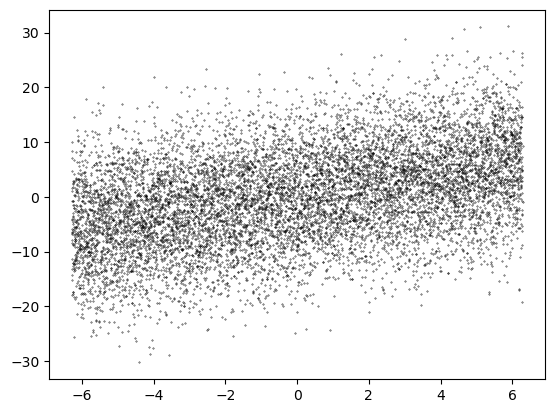

In [38]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = inputs + 8 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [29]:
print(inputs)

[[-6.28318531]
 [-6.28192854]
 [-6.28067178]
 ...
 [ 6.28067178]
 [ 6.28192854]
 [ 6.28318531]]


In [31]:
print(outputs)

[[ -1.69067209]
 [-13.63224078]
 [-18.41210912]
 ...
 [  4.02938002]
 [  7.988854  ]
 [  5.98048517]]


In [34]:
# Create a linear model
linear_model = nn.Sequential(
    nn.Linear(1,1)
)

print(linear_model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


In [10]:
input_tensor = torch.from_numpy(inputs.astype(np.float32))
linear_predictions = linear_model(input_tensor)
print(linear_predictions)

tensor([[-1.6356],
        [-1.6352],
        [-1.6349],
        ...,
        [ 1.5958],
        [ 1.5961],
        [ 1.5965]], grad_fn=<AddmmBackward0>)


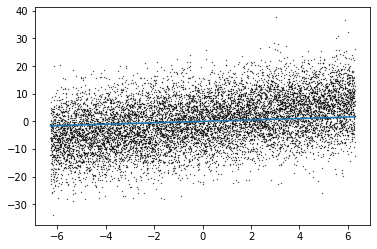

In [11]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0].detach().numpy())

In [12]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(linear_model.parameters(), lr=0.01)


In [13]:
output_tensor = torch.from_numpy(outputs.astype(np.float32))
for epoch in range(3):
  
  permutation = torch.randperm(input_tensor.size()[0])
  tot_loss = 0
  for i in range(0,inputs.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()

        
        y_pred = linear_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()
        # print statistics
        tot_loss += loss
  print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')


print('Finished Training')


1 loss: 64.41224670410156
2 loss: 64.3226318359375
3 loss: 64.41108703613281
Finished Training


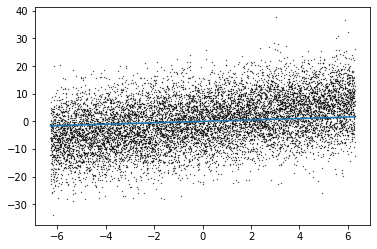

In [14]:
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0].detach().numpy())

## Utilizing a more Complicated Example

(10000, 1)
(10000, 1)


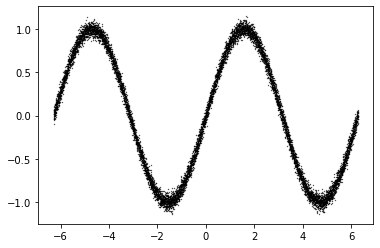

In [15]:
# Input data
import numpy as np
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt

input_tensor = torch.from_numpy(inputs.astype(np.float32))
output_tensor = torch.from_numpy(outputs.astype(np.float32))


plt.scatter(input_tensor[:, 0], output_tensor[:, 0], s=0.1, color='k', marker='o')



In [16]:
model = nn.Sequential(
    nn.Linear(1,1),
    nn.Sigmoid()
    )


In [17]:
pred = model(input_tensor)
print(linear_predictions)

tensor([[-1.6356],
        [-1.6352],
        [-1.6349],
        ...,
        [ 1.5958],
        [ 1.5961],
        [ 1.5965]], grad_fn=<AddmmBackward0>)


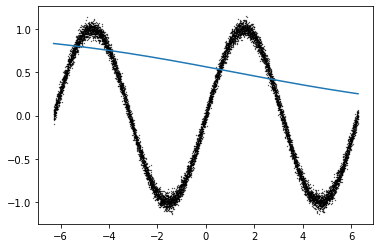

In [18]:
plt.scatter(input_tensor[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(input_tensor[:, 0], pred.detach().numpy()[:, 0])

In [19]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


for epoch in range(3):
  
  permutation = torch.randperm(input_tensor.size()[0])
  for i in range(0,inputs.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()

        
        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()

       
        print(f'{epoch + 1} loss: {loss}')


print('Finished Training')



1 loss: 0.6966374516487122
1 loss: 0.8973193168640137
1 loss: 0.5963963866233826
1 loss: 0.8940206170082092
1 loss: 0.6454833745956421
1 loss: 0.6920770406723022
1 loss: 0.8235244750976562
1 loss: 0.8179330229759216
1 loss: 0.9975320100784302
1 loss: 0.7516145706176758
1 loss: 0.8730360865592957
1 loss: 0.6818050146102905
1 loss: 0.7222929000854492
1 loss: 0.6481717228889465
1 loss: 0.7733528017997742
1 loss: 0.5836058855056763
1 loss: 0.9022270441055298
1 loss: 0.6724599003791809
1 loss: 0.7544878721237183
1 loss: 0.8837898969650269
1 loss: 0.780121386051178
1 loss: 0.7971235513687134
1 loss: 0.819546103477478
1 loss: 0.8100530505180359
1 loss: 0.7227377891540527
1 loss: 0.5451214909553528
1 loss: 0.5661365985870361
1 loss: 0.9268136620521545
1 loss: 0.5629082322120667
1 loss: 0.8061575293540955
1 loss: 0.6263583898544312
1 loss: 0.7405477166175842
1 loss: 0.7641957998275757
1 loss: 0.7718122601509094
1 loss: 0.8624559640884399
1 loss: 0.9563393592834473
1 loss: 0.5884156823158264
1 l

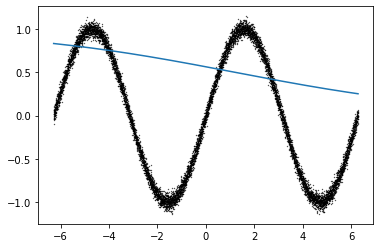

In [20]:
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], pred.detach().numpy()[:, 0])

##Deeper Model

In [21]:
model = nn.Sequential(
    nn.Linear(1,16),
    nn.Sigmoid(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

In [22]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())


In [23]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)


In [24]:
inputs.shape[0]

10000

In [25]:

for epoch in range(5):
  tot_loss = 0
  permutation = torch.randperm(input_tensor.size()[0])
  for i in range(0,inputs.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()

        
        
        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()

        tot_loss += loss
  print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')

print('Finished Training')



1 loss: 0.40296292304992676
2 loss: 0.1955842226743698
3 loss: 0.08473324775695801
4 loss: 0.06826615333557129
5 loss: 0.05812033265829086
Finished Training


In [26]:
pred = model(input_tensor)

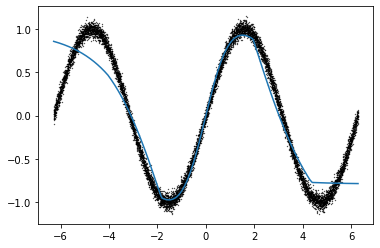

In [27]:
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], pred.detach().numpy()[:, 0])